## Missing Value Imputation Using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [4]:
dataset= pd.read_excel(r'C:/Users/Shambhavi/Downloads/stark_data.xlsx')

In [5]:
dataset.head()

,Character,Age,Gender,Survived
0,Eddard,52.0,Male,0
1,John,27.0,Male,1
2,Arya,21.0,Female,1
3,Bran,19.0,Male,1
4,Robb,NaN,Male,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Character    6 non-null object
Age          5 non-null float64
Gender       6 non-null object
Survived     6 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 272.0+ bytes


In [7]:
dataset.isnull()

,Character,Age,Gender,Survived
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
5,False,False,False,False


In [8]:
sb.heatmap(dataset.isnull())

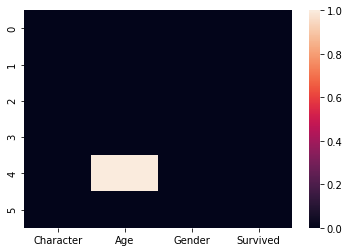

In [9]:
plt.show()

In [10]:
X=dataset.iloc[:,:-1]
Y=dataset.iloc[:,3]
X

,Character,Age,Gender
0,Eddard,52.0,Male
1,John,27.0,Male
2,Arya,21.0,Female
3,Bran,19.0,Male
4,Robb,NaN,Male
5,Sansa,24.0,Female


In [12]:
X["Age"]

0    52.0
1    27.0
2    21.0
3    19.0
4     NaN
5    24.0
Name: Age, dtype: float64

In [13]:
X['Age'].mean()

28.6

In [14]:
def impute_age(Age):
    if pd.isnull(Age):
        return 28.6
    else:
        return Age

In [15]:
X['Age']=X['Age'].apply(impute_age)

In [17]:
X["Age"]

0    52.0
1    27.0
2    21.0
3    19.0
4    28.6
5    24.0
Name: Age, dtype: float64

In [18]:
X

,Character,Age,Gender
0,Eddard,52.0,Male
1,John,27.0,Male
2,Arya,21.0,Female
3,Bran,19.0,Male
4,Robb,28.6,Male
5,Sansa,24.0,Female


In [21]:
sb.heatmap(X.isnull())

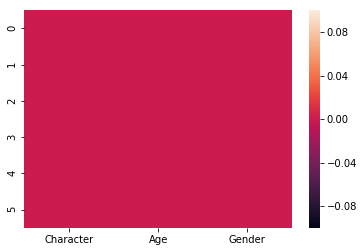

In [22]:
plt.show()

## Missing Value Imputation Using ML model

In [26]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,3].values
X[:,1:2]


array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [nan],
       [24.0]], dtype=object)

In [28]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imputer.fit(X[:,1:2])
X[:,1:2]=imputer.transform(X[:,1:2])
X[:,1:2]

array([[52.0],
       [27.0],
       [21.0],
       [19.0],
       [28.6],
       [24.0]], dtype=object)

In [29]:
X

array([['Eddard', 52.0, 'Male'],
       ['John', 27.0, 'Male'],
       ['Arya', 21.0, 'Female'],
       ['Bran', 19.0, 'Male'],
       ['Robb', 28.6, 'Male'],
       ['Sansa', 24.0, 'Female']], dtype=object)

In [31]:
X[:,1]

array([52.0, 27.0, 21.0, 19.0, 28.6, 24.0], dtype=object)

In [32]:
help(Imputer)

Help on class Imputer in module sklearn.preprocessing.imputation:

class Imputer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Imputation transformer for completing missing values.
 |  
 |  Read more in the :ref:`User Guide <imputation>`.
 |  
 |  Parameters
 |  ----------
 |  missing_values : integer or "NaN", optional (default="NaN")
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For missing values encoded as np.nan,
 |      use the string value "NaN".
 |  
 |  strategy : string, optional (default="mean")
 |      The imputation strategy.
 |  
 |      - If "mean", then replace missing values using the mean along
 |        the axis.
 |      - If "median", then replace missing values using the median along
 |        the axis.
 |      - If "most_frequent", then replace missing using the most frequent
 |        value along the axis.
 |  
 |  axis : integer, optional (default=0)
 |      The axis along which to i